data.zip(27.8MB)

- KRI-DAC_Jeju_data5.txt(37MB)

- KRI-DAC_Jeju_data6.txt(38MB)

- KRI-DAC_Jeju_data7.txt(41.6MB)

- KRI-DAC_Jeju_data8.txt(37.4MB)



데이터 정의

YM : 기준년월

SIDO : 지역대분류명

SIGUNGU : 지역중분류명

FranClass : 소상공인구분

Type : 업종명

Time : 시간대

TotalSpent : 총사용금액

DisSpent : 재난지원금 사용금액

NumOfSpent : 총 이용건수

NumOfDisSpent : 총 재난지원금 이용건수

POINT_X, POINT_Y : X,Y 좌표

In [1]:
import pandas as pd
import numpy as np

# 데이터 시각화 및 한글 폰트 지정
import matplotlib.pyplot as plt
import matplotlib as mpl
font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name)
plt.rc('font', size=20)
import seaborn as sns 

# 경고 문구 제거
import warnings
warnings.filterwarnings(action='ignore')

# 경도 위도 변환
from pyproj import Proj, Transformer 

# 지도 시각화
import folium

In [2]:
# 데이터 가져오기
df5 = pd.read_csv('C:/Users/GaeJu/Desktop/20210126_최연석/KRI-DAC_Jeju_data5.txt', sep=',')
df6 = pd.read_csv('C:/Users/GaeJu/Desktop/20210126_최연석/KRI-DAC_Jeju_data6.txt', sep=',')
df7 = pd.read_csv('C:/Users/GaeJu/Desktop/20210126_최연석/KRI-DAC_Jeju_data7.txt', sep=',')
df8 = pd.read_csv('C:/Users/GaeJu/Desktop/20210126_최연석/KRI-DAC_Jeju_data8.txt', sep=',')
df5.tail(3)

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y
273180,273181,273181,202005,제주특별자치도,제주시,영세,편의점,x시,4800,0,1,0,950266.5976,1.502458e+06
273181,273182,273182,202005,제주특별자치도,제주시,중소,제과점,x시,25000,0,2,0,950524.6587,1.500760e+06
273182,273183,273183,202005,제주특별자치도,제주시,영세,서양음식,x시,6000,0,1,0,950674.5989,1.500760e+06


In [3]:
# 5월
transformer = Transformer.from_proj(Proj(init='epsg:5178'), Proj(init='epsg:4326'))
points = []
for index, item in df5[['POINT_X', 'POINT_Y']].iterrows():
    points.append((item.POINT_X, item.POINT_Y))
    
latlist, lnglist = [], []
for pt in transformer.itransform(points):
    latlist.append(pt[1])
    lnglist.append(pt[0])
    
df5['latitude'] = latlist
df5['longitude'] = lnglist

In [4]:
# 6월
transformer = Transformer.from_proj(Proj(init='epsg:5178'), Proj(init='epsg:4326'))
points = []
for index, item in df6[['POINT_X', 'POINT_Y']].iterrows():
    points.append((item.POINT_X, item.POINT_Y))
    
latlist, lnglist = [], []
for pt in transformer.itransform(points):
    latlist.append(pt[1])
    lnglist.append(pt[0])
    
df6['latitude'] = latlist
df6['longitude'] = lnglist

In [5]:
# 7월
transformer = Transformer.from_proj(Proj(init='epsg:5178'), Proj(init='epsg:4326'))
points = []
for index, item in df7[['POINT_X', 'POINT_Y']].iterrows():
    points.append((item.POINT_X, item.POINT_Y))
    
latlist, lnglist = [], []
for pt in transformer.itransform(points):
    latlist.append(pt[1])
    lnglist.append(pt[0])
    
df7['latitude'] = latlist
df7['longitude'] = lnglist

In [6]:
# 8월
transformer = Transformer.from_proj(Proj(init='epsg:5178'), Proj(init='epsg:4326'))
points = []
for index, item in df8[['POINT_X', 'POINT_Y']].iterrows():
    points.append((item.POINT_X, item.POINT_Y))
    
latlist, lnglist = [], []
for pt in transformer.itransform(points):
    latlist.append(pt[1])
    lnglist.append(pt[0])
    
df8['latitude'] = latlist
df8['longitude'] = lnglist

In [7]:
df5 = df5.drop(['POINT_X','POINT_Y'],axis=1)
df6 = df6.drop(['POINT_X','POINT_Y'],axis=1)
df7 = df7.drop(['POINT_X','POINT_Y'],axis=1)
df8 = df8.drop(['POINT_X','POINT_Y'],axis=1)

In [8]:
df5.head(3)

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,latitude,longitude
0,1,1,202005,제주특별자치도,제주시,영세,일반한식,00시,363000,66500,10,2,33.305090,126.176746
1,2,2,202005,제주특별자치도,제주시,영세,단란주점,00시,1180000,0,3,0,33.305540,126.176737
2,3,3,202005,제주특별자치도,제주시,중소1,편의점,00시,157670,6850,20,2,33.303746,126.177311


In [9]:
df5 = df5[df5['DisSpent']!=0]
df6 = df6[df6['DisSpent']!=0]
df7 = df7[df7['DisSpent']!=0]
df8 = df8[df8['DisSpent']!=0]

In [10]:
# 용량이 너무 크게 나와서 생략
# map = folium.Map(location=[33.33, 126.55], zoom_start=10)

# for i in df5.index:
#     folium.Circle(
#         location = df5.loc[i, ['latitude', 'longitude']],
#         radius = 150,
#         color='red'
#     ).add_to(map)
# for i in df6.index:
#     folium.Circle(
#         location = df6.loc[i, ['latitude', 'longitude']],
#         radius = 150,
#         color='green'
#     ).add_to(map)
# for i in df7.index:
#     folium.Circle(
#         location = df7.loc[i, ['latitude', 'longitude']],
#         radius = 150,
#         color='blue'
#     ).add_to(map)
# for i in df8.index:
#     folium.Circle(
#         location = df8.loc[i, ['latitude', 'longitude']],
#         radius = 150,
#         color='yellow'
#     ).add_to(map)
# map

## 데이터 전처리

In [11]:
total = pd.concat([df5,df6,df7,df8])
total = total.drop(['X','Y'],axis=1)  # 불필요한 열 삭제
total.head()

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,latitude,longitude
0,1,1,202005,제주특별자치도,제주시,영세,일반한식,00시,363000,66500,10,2,33.305090,126.176746
2,3,3,202005,제주특별자치도,제주시,중소1,편의점,00시,157670,6850,20,2,33.303746,126.177311
6,7,7,202005,제주특별자치도,제주시,영세,서양음식,00시,26000,26000,1,1,33.359228,126.179917
7,8,8,202005,제주특별자치도,제주시,중소1,편의점,00시,215910,34250,27,4,33.352476,126.180594
15,16,16,202005,제주특별자치도,제주시,영세,편의점,00시,250980,30510,17,1,33.389210,126.227117


In [12]:
total.isnull().sum()

OBJECTID         0
Field1           0
YM               0
SIDO             0
SIGUNGU          0
FranClass        0
Type             0
Time             0
TotalSpent       0
DisSpent         0
NumofSpent       0
NumofDisSpent    0
latitude         0
longitude        0
dtype: int64

In [13]:
# Time에 '시'를 제거
total['Time']= total['Time'].str.replace('시', '')

# 시간을 큰 범위로 변경
def time_set(x):
    if '02'<= x <'06':
        return '새벽'
    elif '06'<= x < '11':
        return '오전'
    elif '11'<= x < '15':
        return '점심'
    elif '15'<= x < '18':
        return '오후'
    elif '18'<= x < '22':
        return '저녁'
    else:
        return '심야'

In [14]:
total['Time_set'] = total['Time'].apply(time_set)

total.loc[total['Time']=='x', 'Time_set'] ='무승인거래'

In [15]:
total.head()

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,latitude,longitude,Time_set
0,1,1,202005,제주특별자치도,제주시,영세,일반한식,00,363000,66500,10,2,33.305090,126.176746,심야
2,3,3,202005,제주특별자치도,제주시,중소1,편의점,00,157670,6850,20,2,33.303746,126.177311,심야
6,7,7,202005,제주특별자치도,제주시,영세,서양음식,00,26000,26000,1,1,33.359228,126.179917,심야
7,8,8,202005,제주특별자치도,제주시,중소1,편의점,00,215910,34250,27,4,33.352476,126.180594,심야
15,16,16,202005,제주특별자치도,제주시,영세,편의점,00,250980,30510,17,1,33.389210,126.227117,심야


## ▶따로 결측치는 없고 'Time'에 결측치 'x시' 로 되어 있으므로 'x시'를 '무승인거래'로 처리

In [16]:
Type = pd.concat([df5,df6,df7,df8])

In [17]:
Type.replace(dict.fromkeys(['택시', '기타교통수단', '통신기기'], '교통/통신'), inplace=True)
Type.replace(dict.fromkeys(['대형할인점', '농축협직영매장', '농협하나로클럽', '편의점', '슈퍼마켓', '정육점', '기타유통업', '연쇄점', '상품권', '인삼제품', '홍삼제품', '농축수산품', '주류판매점', '기타건강식', '건강식품(회원제형태)'], '마트/편의점(유통)'), inplace=True)
Type.replace(dict.fromkeys(['악기점', 'DVD음반테이프판매', '문화취미기타', '영화관', '티켓', '수족관', '화랑'], '영화/문화'), inplace=True)
Type.replace(dict.fromkeys(['내의판매점', '양품점', '옷감직물', '귀금속', '기타직물', '스포츠의류', '가방', '정장', '악세사리', '기타잡화', '신발', '기타의류', '단체복', '아동의류', '캐쥬얼의류', '맞춤복점', '제화점', '인터넷Mall', '인터넷종합Mall'], '쇼핑/패션'), inplace=True)
Type.replace(dict.fromkeys(['제과점', '스넥', '기타음료식품'], '카페/베이커리'), inplace=True)
Type.replace(dict.fromkeys(['미용재료', '화장품', '피부미용실', '미용원', '이용원'], '뷰티'), inplace=True)
Type.replace(dict.fromkeys(['구내매점', '단란주점', '주점', '서양음식', '일반한식', '일식회집', '중국음식',  '유흥주점', '칵테일바'], '외식/주점'), inplace=True)
Type.replace(dict.fromkeys(['세탁소', '애완동물', '화원', '침구수예점', '성인용품점', '가전제품', '기타가구', '조명기구', '민예공예품', '주방용식기', '기타전기제품', '소프트웨어', '주방용구', '카페트커텐천막', '컴퓨터', '카메라', '일반가구', '정수기', '철제가구', '시계', '안경', '사우나', '안마스포츠마사지', '사진관', '인테리어', 'CATV'], '생활/기타'), inplace=True)
Type.replace(dict.fromkeys(['완구점', '화방표구점', '문구용품', '일반서적', '출판인쇄물', '기타사무용', '사무기기', '전문서적', '정기간행물', '기타서적문구', '서적출판(회원제형태)'], '서점/문구'), inplace=True)
Type.replace(dict.fromkeys(['기타보험', '손해보험'], '금융'), inplace=True)
Type.replace(dict.fromkeys(['기념품점', '기타숙박업', '특급호텔', '2급호텔', '1급호텔', '콘도', '렌트카', '관광여행', '항공사', '여객선', '면세점'], '여행/숙박'), inplace=True)
Type.replace(dict.fromkeys(['레져용품수리', '스포츠레져용품', '골프용품', '노래방', '당구장', '골프경기장', '볼링장', '골프연습장', '헬스크럽', '레져업소(회원제형태)', '기타레져업', '종합레져타운', '수영장', '테니스장', '기타회원제형태업소', ], '레저/스포츠'), inplace=True)
Type.replace(dict.fromkeys(['유아원', '독서실', '보습학원', '기능학원', '기타교육', '외국어학원', '학원(회원제형태)', '예체능학원', '컴퓨터학원', '대학등록금', '학습지교육', '초중고교육기관'], '교육/육아'), inplace=True)
Type.replace(dict.fromkeys(['주유소', '자동차정비', 'LPG', '세차장', '유류판매', '이륜차판매', '윤활유전문판매', '자동차시트타이어', '중고자동차', '수입자동차', '자동차부품', '주차장', '기타자동차서비스', '카인테리어', ], '주유/자동차'), inplace=True)
Type.replace(dict.fromkeys(['약국', '종합병원', '기타의료기관및기기', '한약방', '제약회사', '의료용품', '건강진단', '한의원', '동물병원', '의원', '치과의원', '병원', '산후조리원', '치과병원'], '의료'), inplace=True)
Type.replace(dict.fromkeys(['목재석재철물', '건축요업품', '골동품점', '기계공구', '기타건축자재', '보일러펌프', '페인트', '냉열기기', '유리', '과학기자재', '기타광학품', '기타연료', '중장비수리', ], '건설/제조'), inplace=True)
Type.replace(dict.fromkeys(['기타농업관련', '비료농약사료종자', '농기계', '미곡상'], '농업'), inplace=True)
Type.replace(dict.fromkeys(['사무서비스', '기타대인서비스', '화물운송', '보관창고업', '종합용역', '조세서비스', '가례서비스', '공공요금', '위탁급식업', '기타용역서비스', '기타수리서비스', '기타운송', '가정용품수리', '견인서비스', '부동산중개임대', '부동산분양', '신변잡화수리', '사무통신기기수리', '법률회계서비스', '사무서비스(회원제형태)', '정보서비스', '기타업종', '기타비영리유통'], '서비스/기타'), inplace=True)

In [18]:
# 카테고리 추가하기 
total['Category'] = Type['Type']
total.head()

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,latitude,longitude,Time_set,Category
0,1,1,202005,제주특별자치도,제주시,영세,일반한식,00,363000,66500,10,2,33.305090,126.176746,심야,외식/주점
2,3,3,202005,제주특별자치도,제주시,중소1,편의점,00,157670,6850,20,2,33.303746,126.177311,심야,마트/편의점(유통)
6,7,7,202005,제주특별자치도,제주시,영세,서양음식,00,26000,26000,1,1,33.359228,126.179917,심야,외식/주점
7,8,8,202005,제주특별자치도,제주시,중소1,편의점,00,215910,34250,27,4,33.352476,126.180594,심야,마트/편의점(유통)
15,16,16,202005,제주특별자치도,제주시,영세,편의점,00,250980,30510,17,1,33.389210,126.227117,심야,마트/편의점(유통)


## ▶ Type 분류 작업

# 1. 데이터 시각화 및 분석

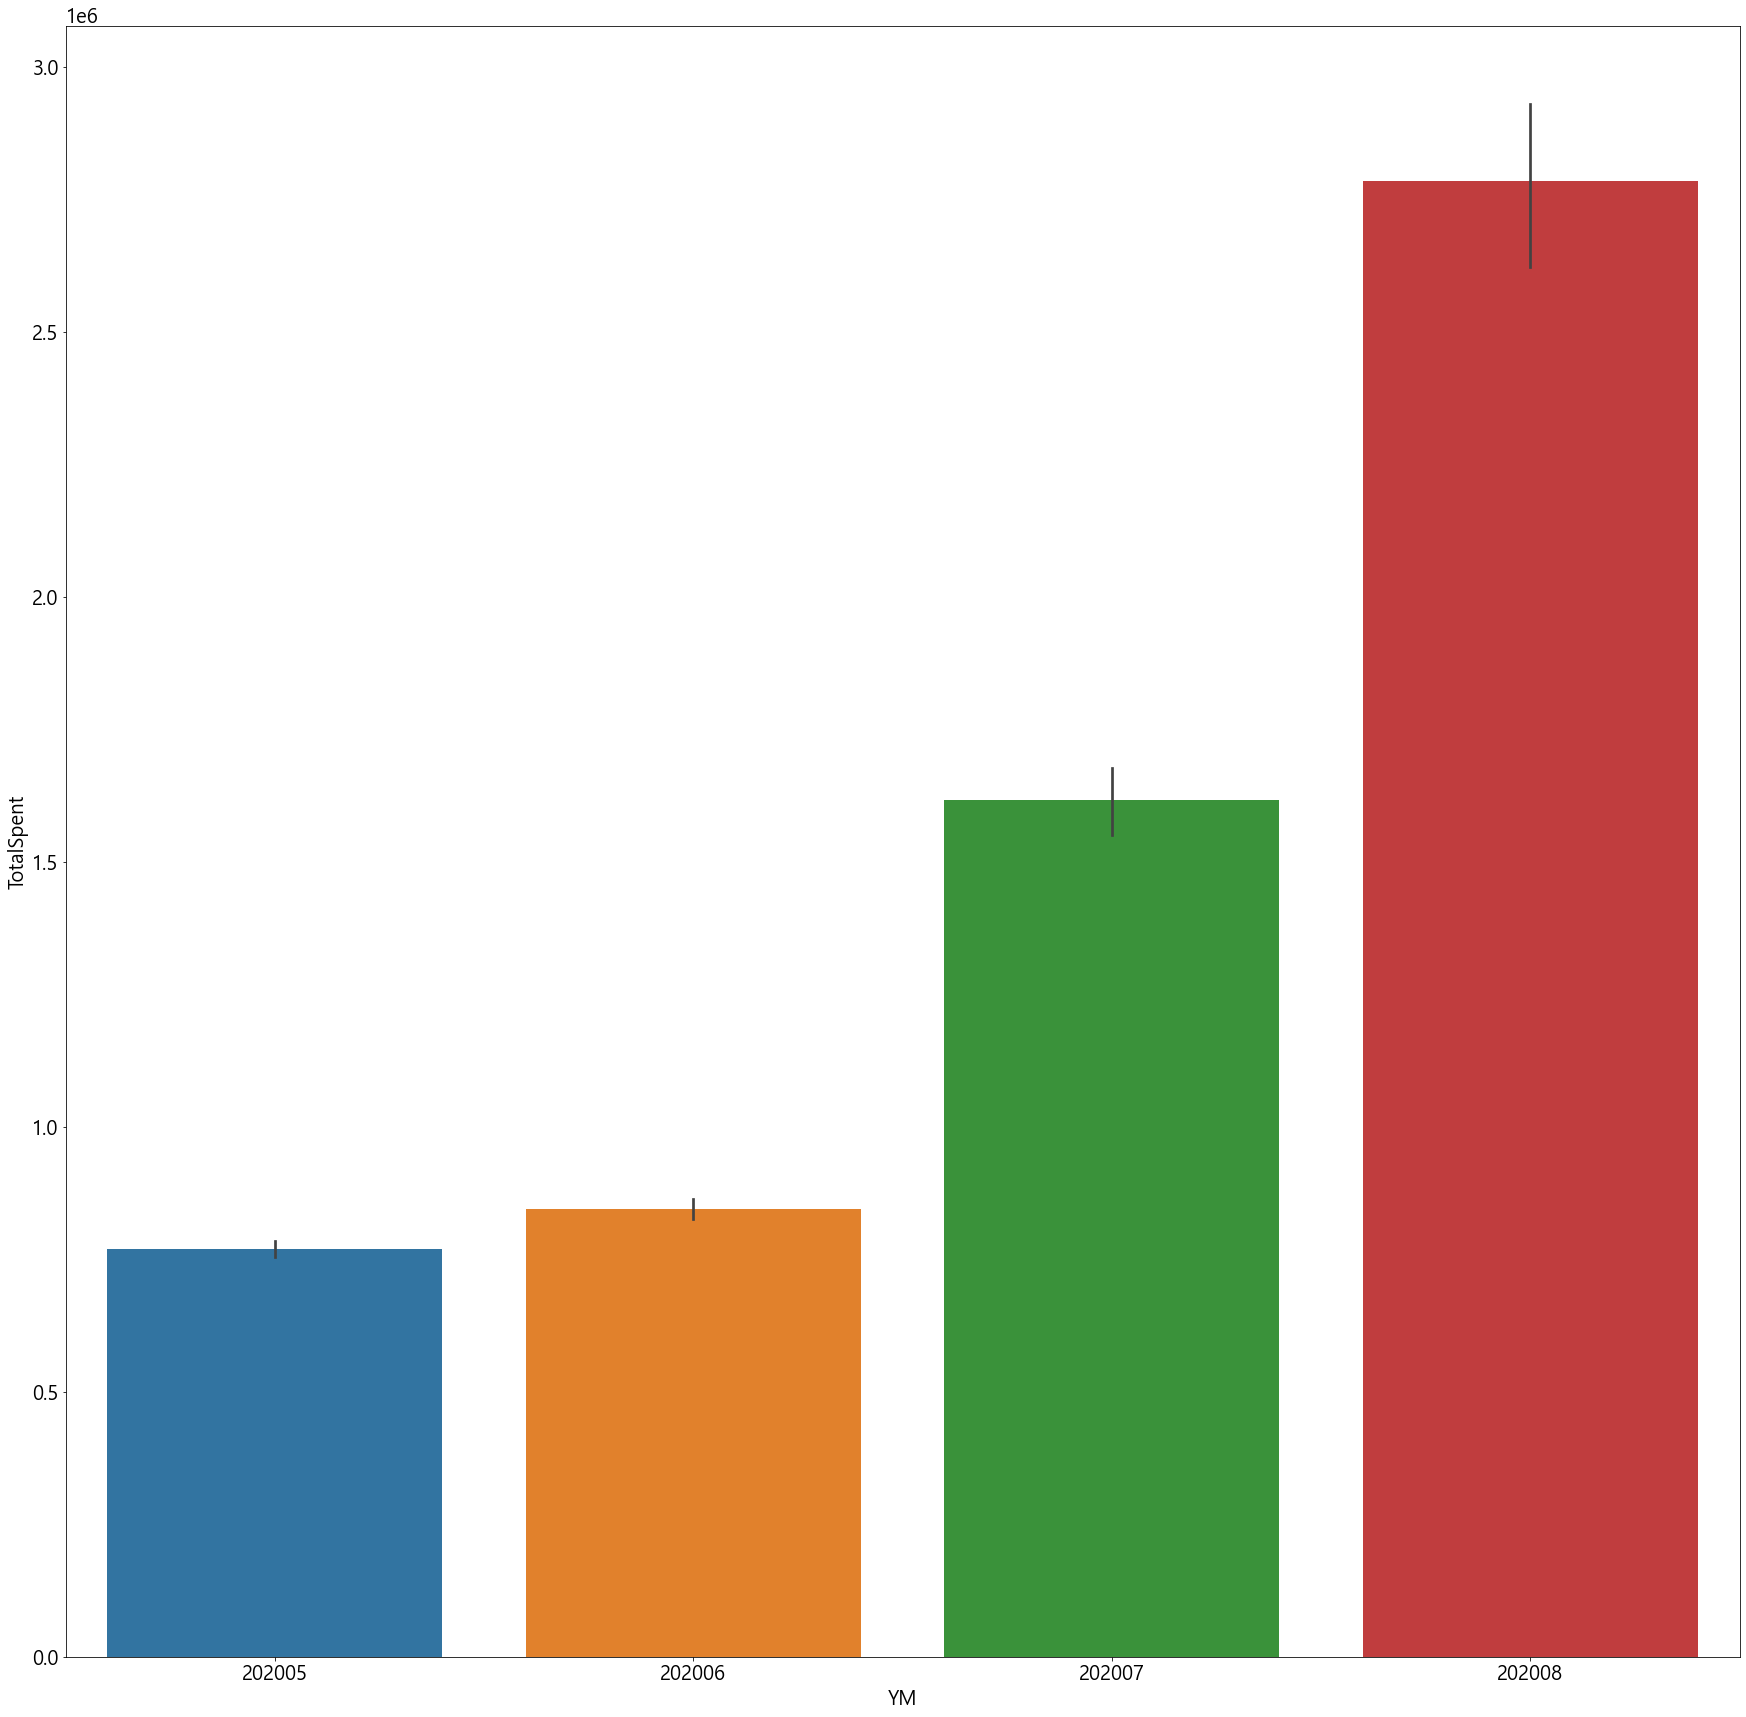

In [19]:
#월별 총 사용금액 
plt.figure(figsize=(30,30))
sns.barplot(data=total, x="YM", y="TotalSpent")

### 월별 : 제주도의 총사용금액은 8월 >7월 > 6월 > 5월 순으로 크다. 시간이 지날수록 더욱 더 사용횟수가 많아 짐을 알 수 있다.

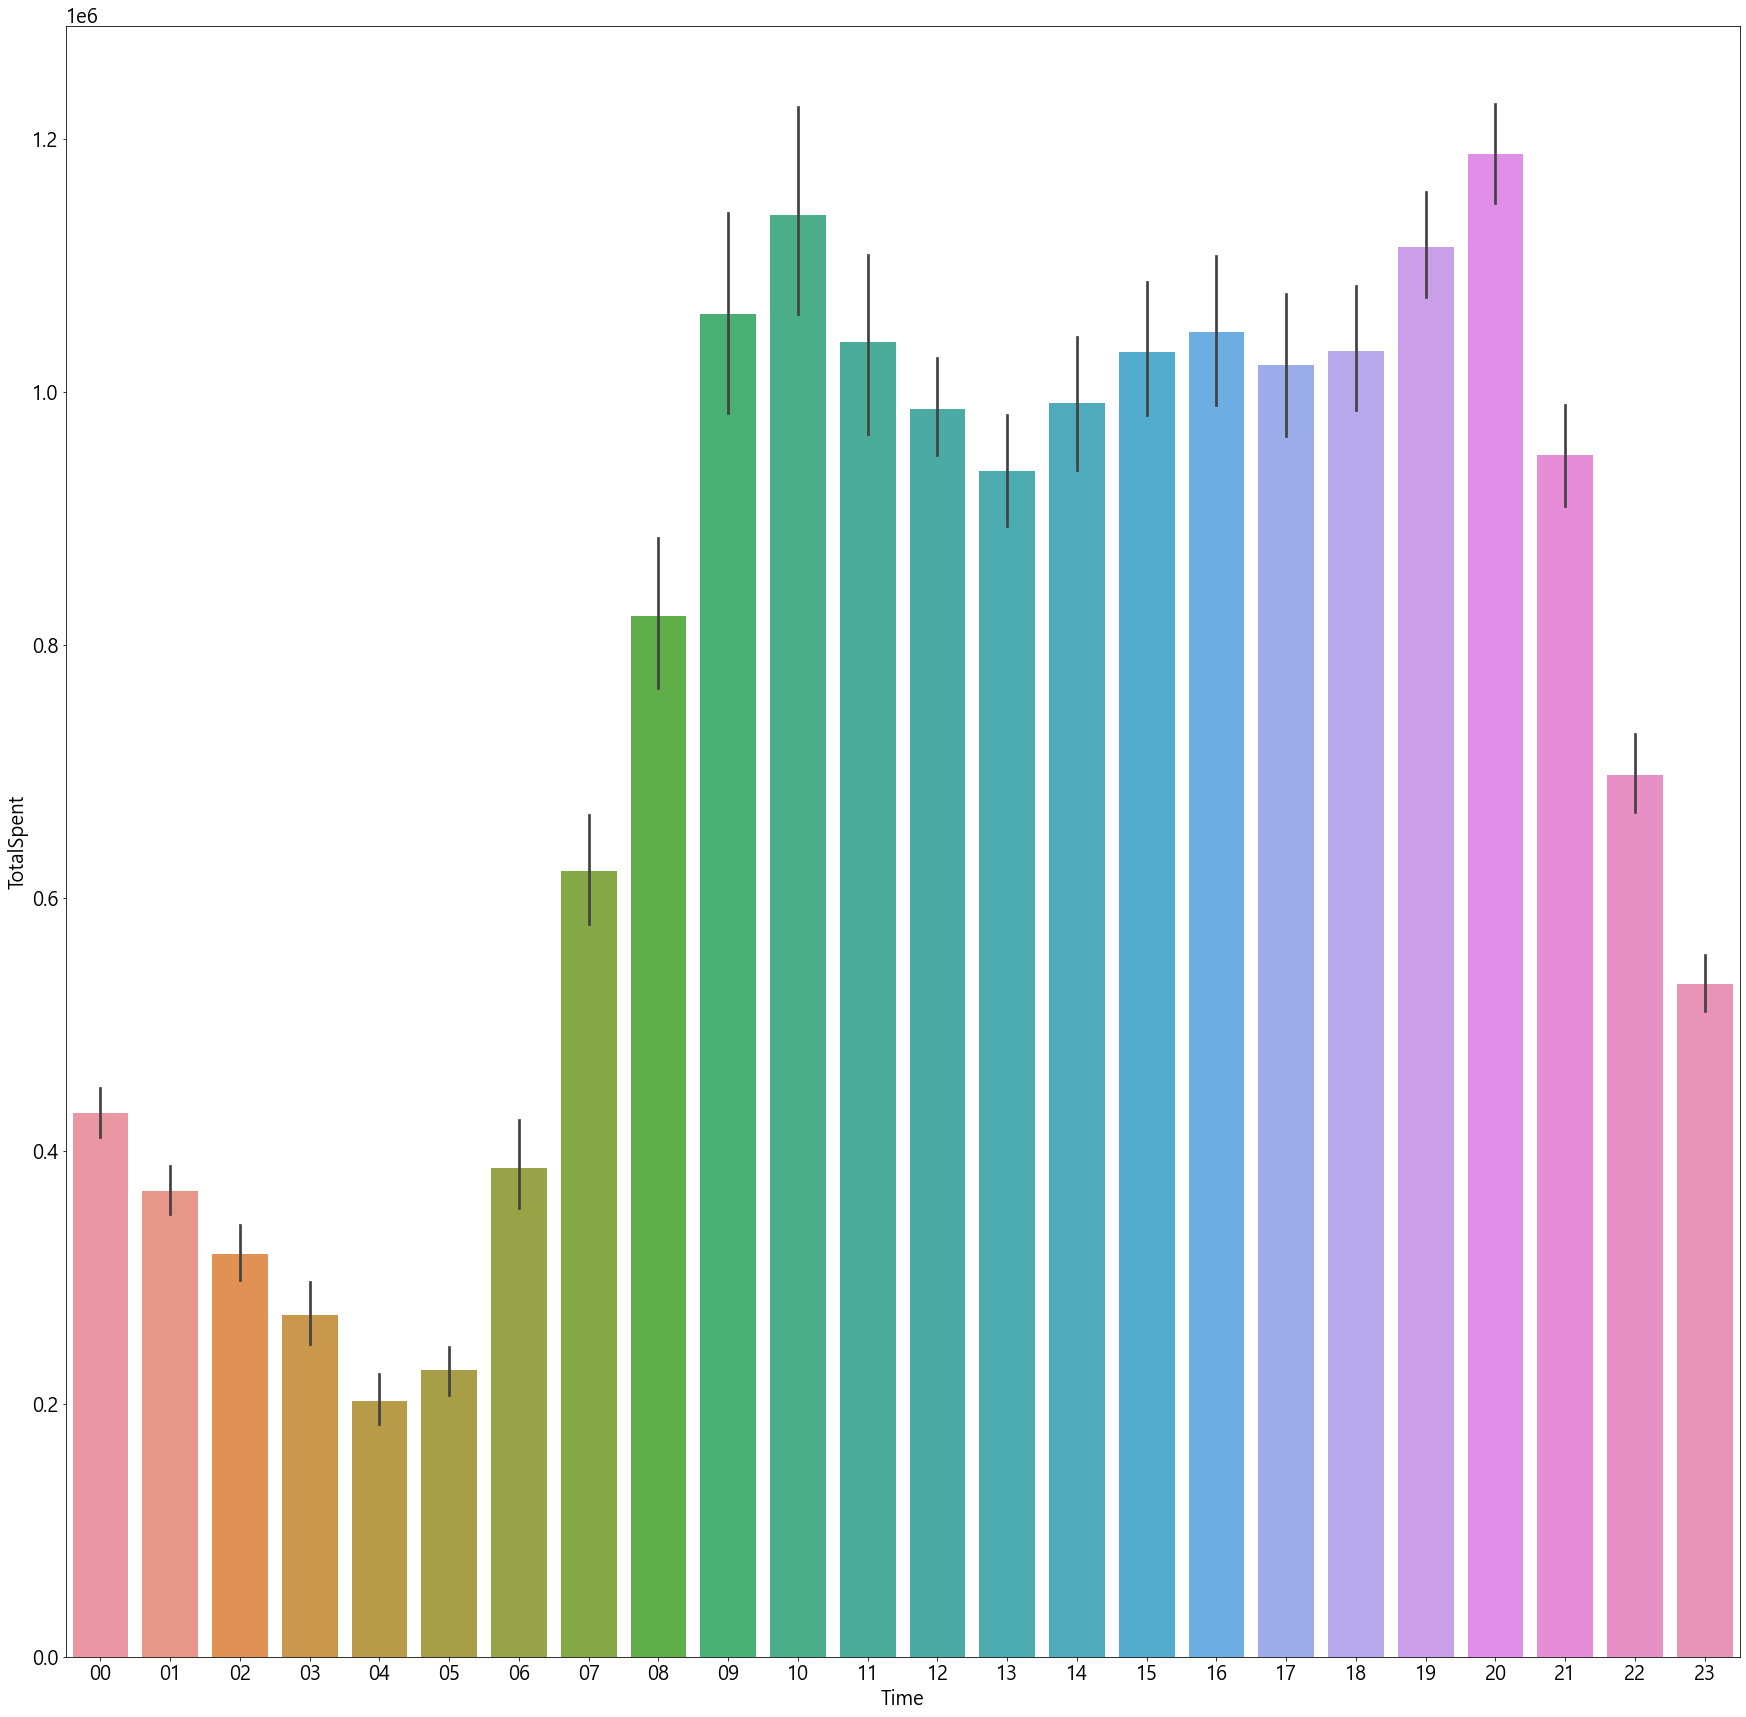

In [20]:
#시간대별 총 사용금액
plt.figure(figsize=(30,30))
sns.barplot(data=total, x="Time", y="TotalSpent")

### 시간별 : 총 사용금액을 시간별로 분석해보면 저녁 식사시간대가 가장 높았고 주로 활동이 적은 새벽에 사용하는 횟수가 적음을 알 수 있다.

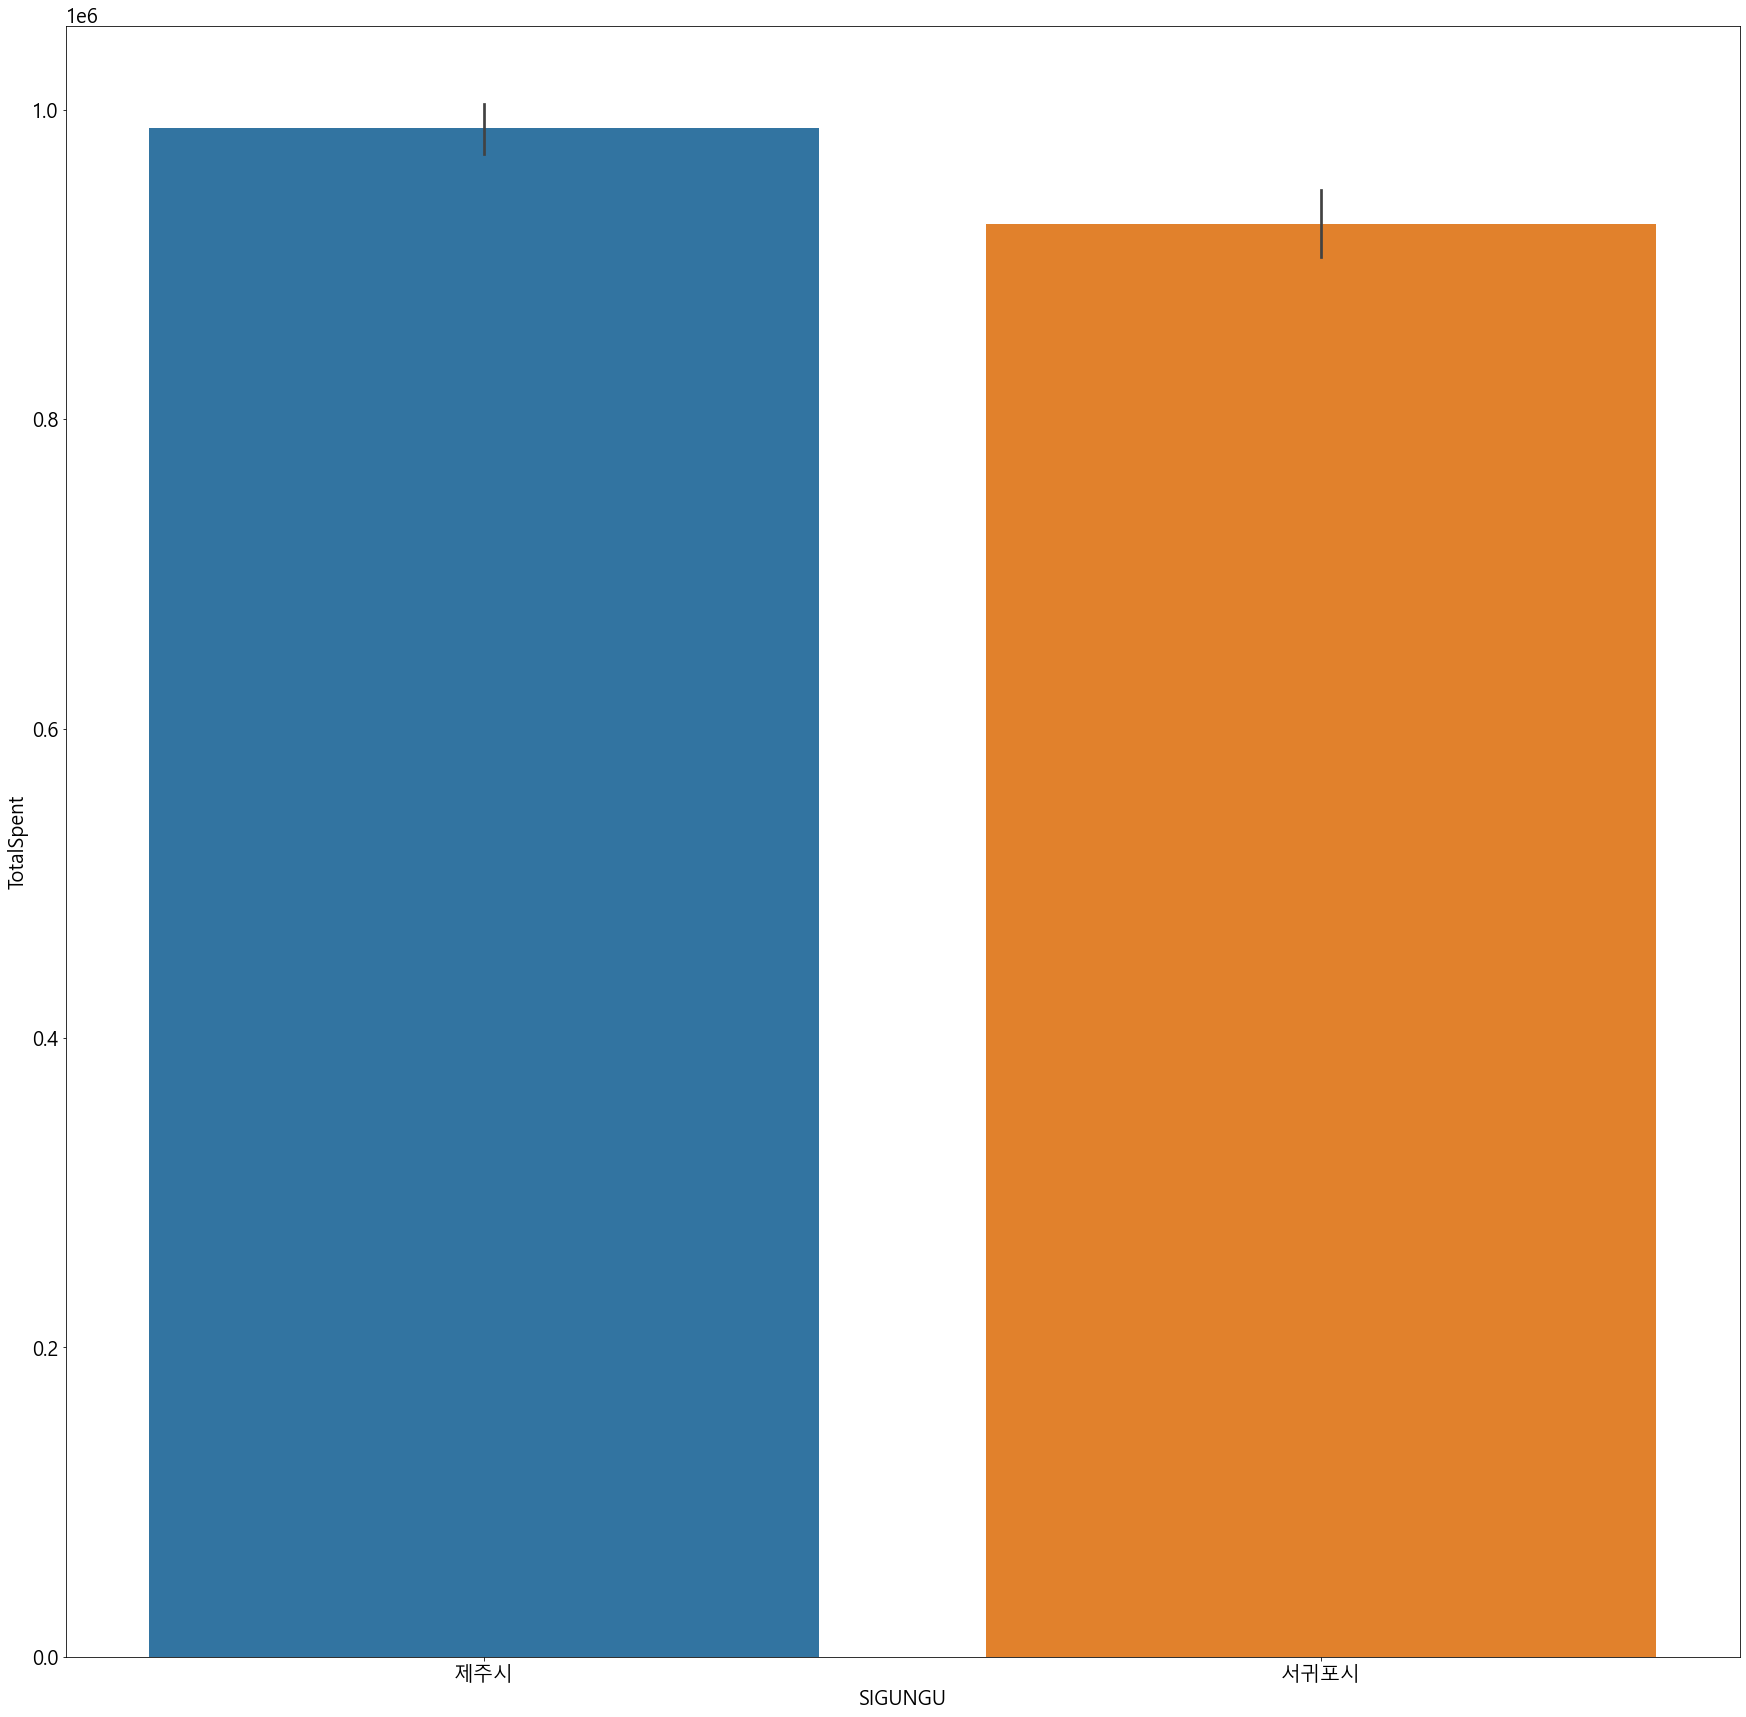

In [21]:
#제주/서귀포 총 사용금액 
plt.figure(figsize=(30,30))
sns.barplot(data=total, x="SIGUNGU", y="TotalSpent")

### 지역별 : 제주시가 서귀포시보다 총 사용금액이 조금 높있음을 알 수 있다.

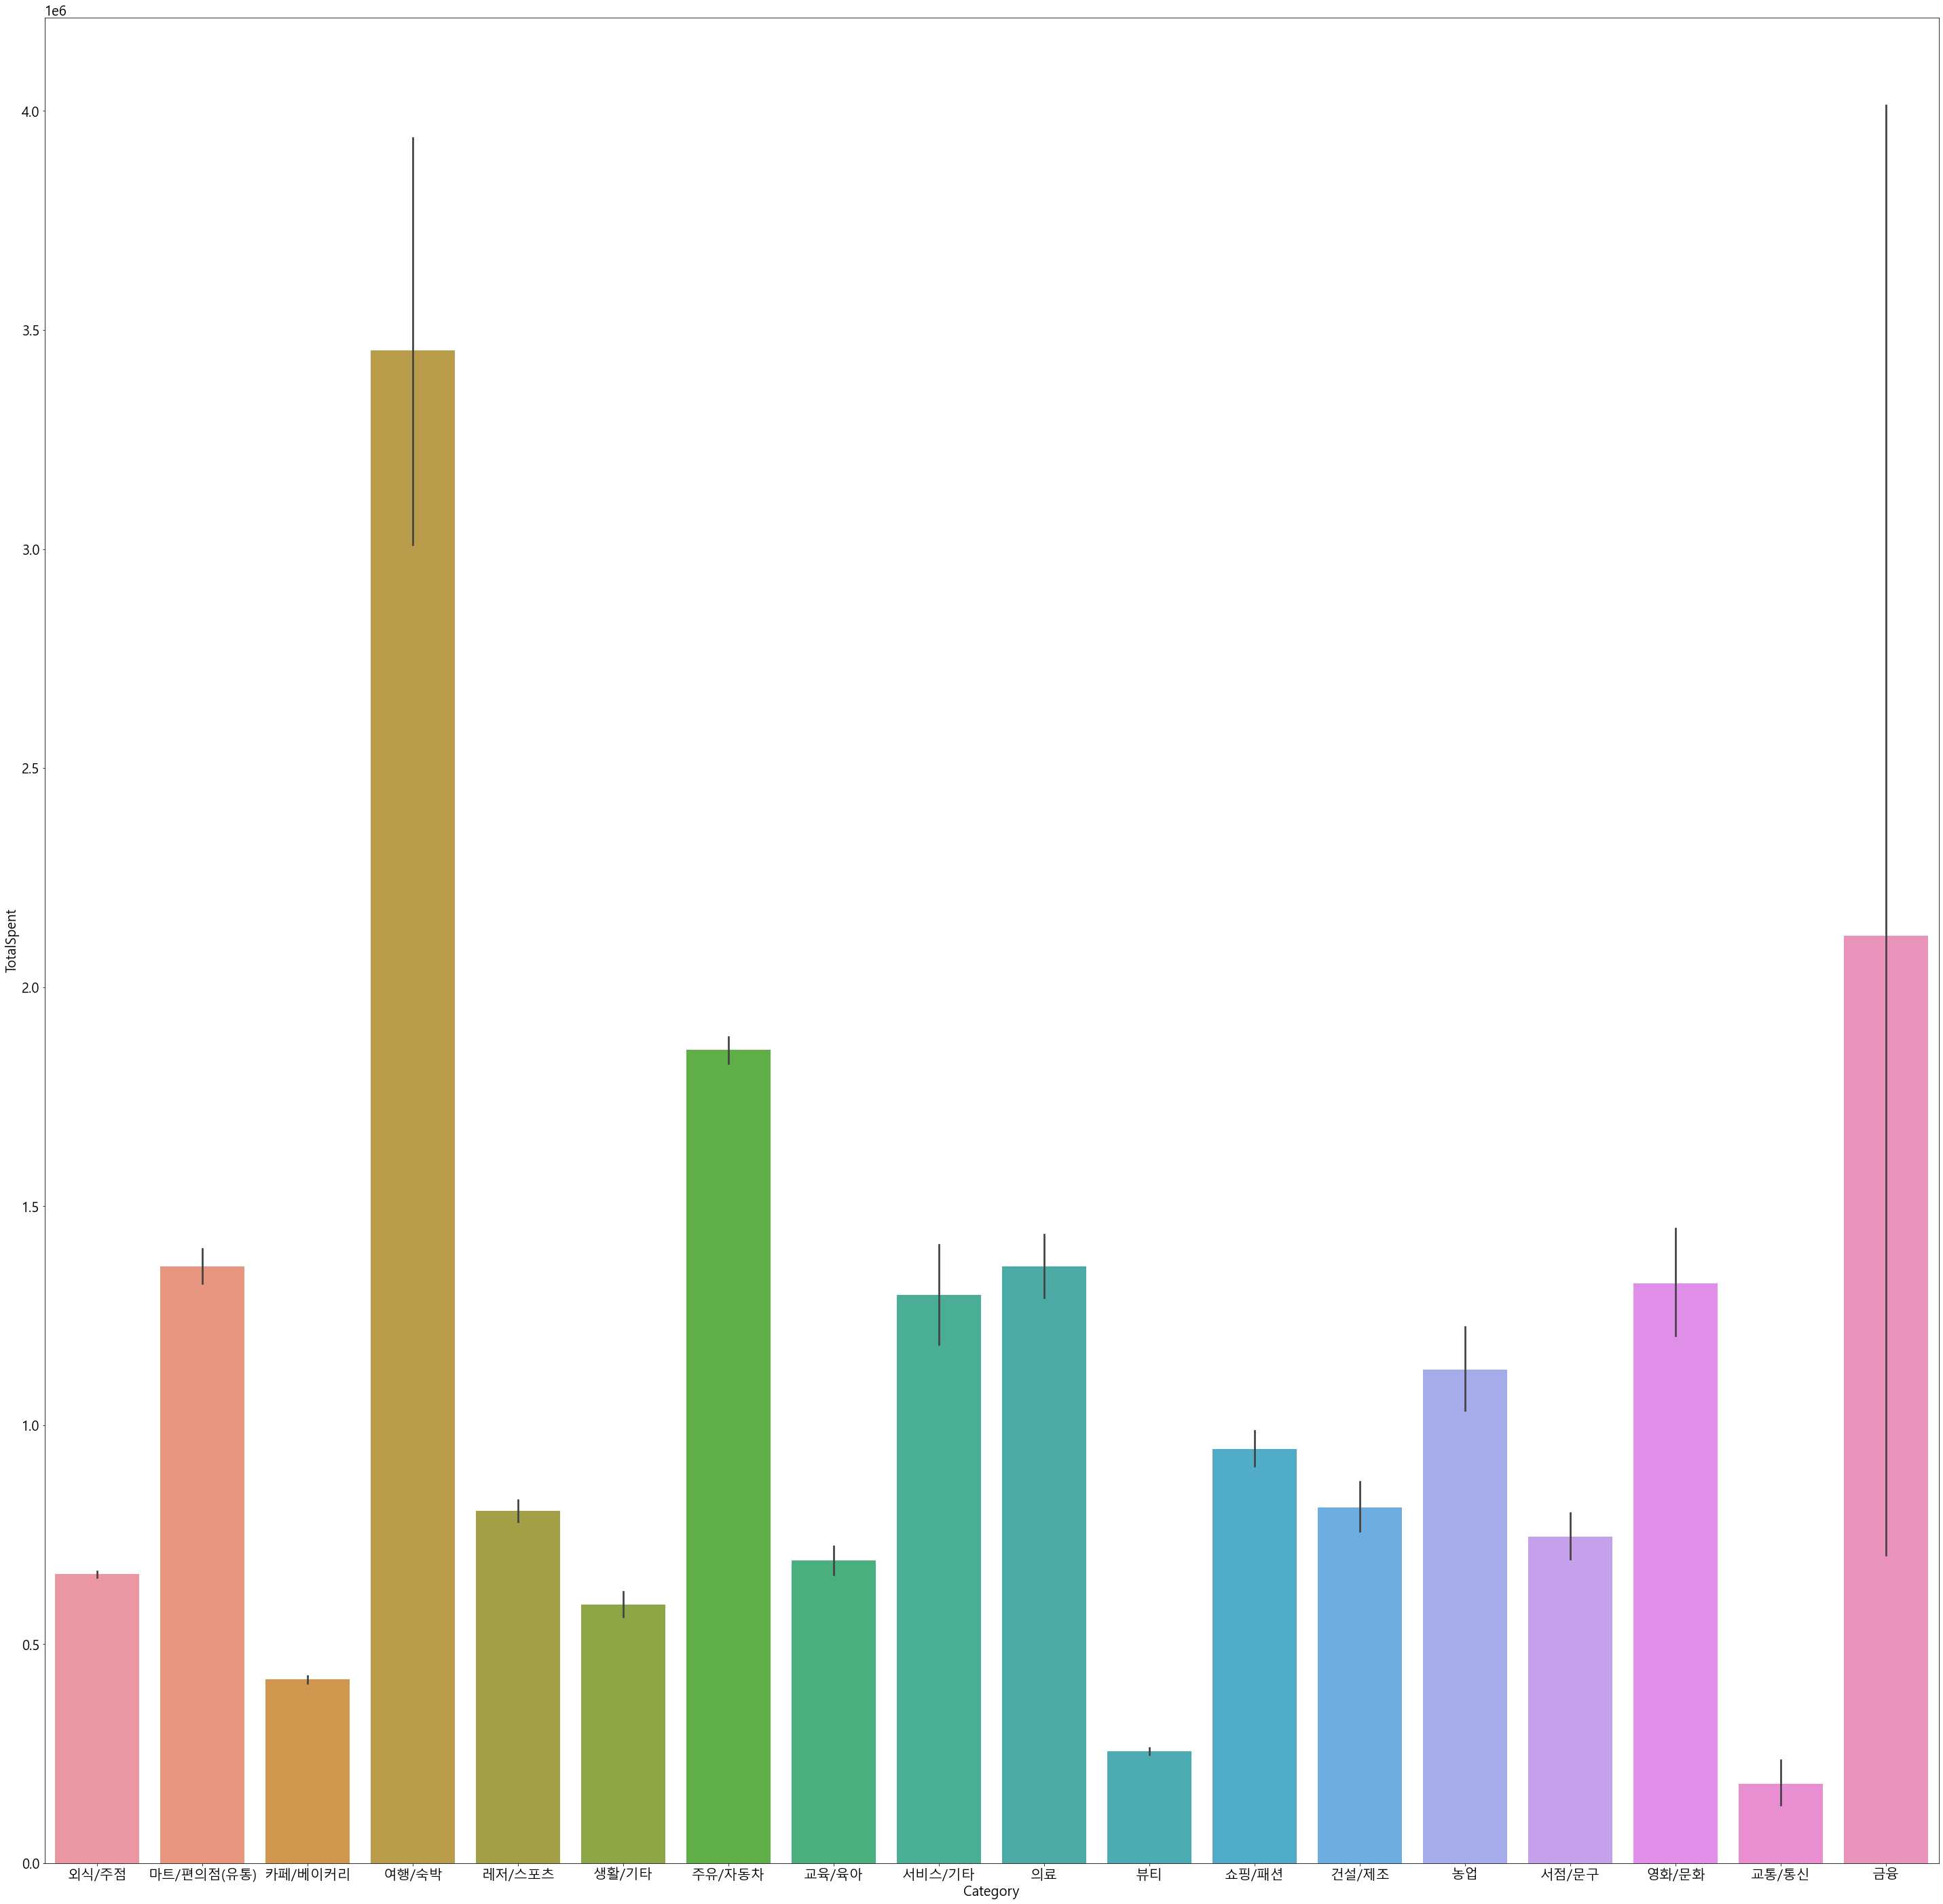

In [22]:
#업종구분별 사용금액 
plt.figure(figsize=(50,50))
sns.barplot(data=total, x="Category", y="TotalSpent")

### 업종별 : 여행/숙박에서 총 사용금액이 제일 높았고 교통/통신에서는 제일 낮았다.

# 2. 각 월별 소비 업종 분석

In [23]:
# 총 이용건수와 총 재난지원금 이용건수 컬럼의 정규화 과정

# 월별로 각 컬럼의 최대값으로 나누어 줌
col = ['NumofSpent', 'NumofDisSpent']
df5_type = (df5[col]) / (df5[col].max())
df6_type = (df6[col]) / (df6[col].max())
df7_type = (df7[col]) / (df7[col].max())
df8_type = (df8[col]) / (df8[col].max())

df5[col] = df5_type[col]
df6[col] = df6_type[col]
df7[col] = df7_type[col]
df8[col] = df8_type[col]

## 2-1. 총 이용건수

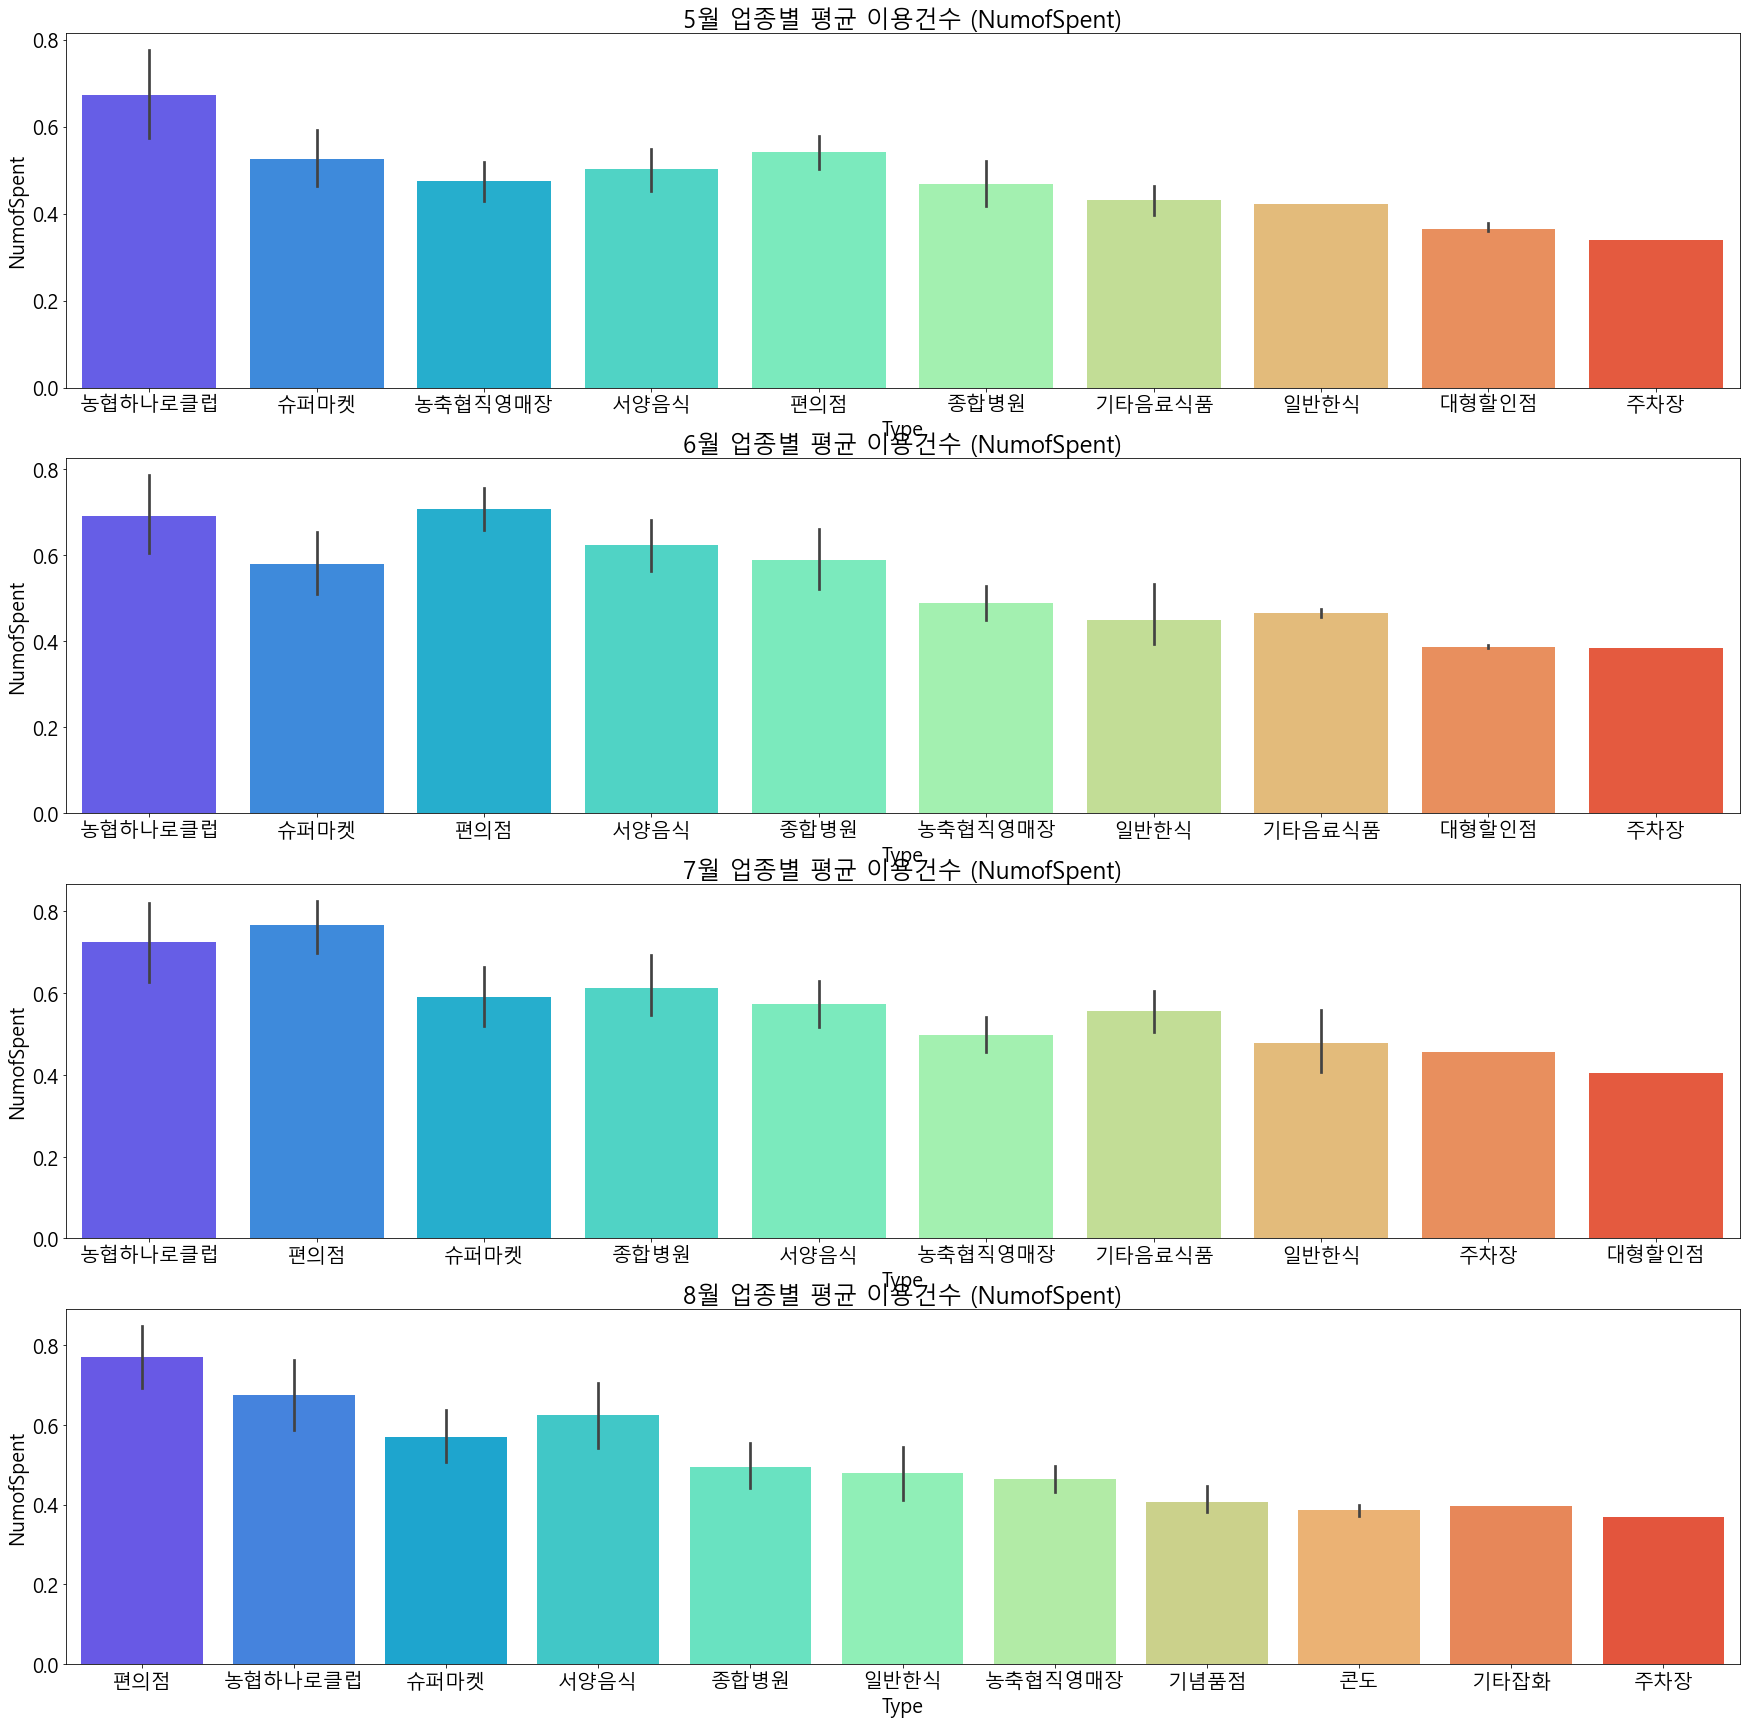

In [24]:
fig = plt.figure(figsize=(30,30))
ax1 = fig.add_subplot(411)
ax1 = sns.barplot(data=df5.nlargest(100, 'NumofSpent'), x='Type', y='NumofSpent', palette='rainbow')
ax1.set_title('5월 업종별 평균 이용건수 (NumofSpent)')

ax2 = fig.add_subplot(412)
ax2 = sns.barplot(data=df6.nlargest(100, 'NumofSpent'), x='Type', y='NumofSpent', palette='rainbow')
ax2.set_title('6월 업종별 평균 이용건수 (NumofSpent)')

ax3 = fig.add_subplot(413)
ax3 = sns.barplot(data=df7.nlargest(100, 'NumofSpent'), x='Type', y='NumofSpent', palette='rainbow')
ax3.set_title('7월 업종별 평균 이용건수 (NumofSpent)')

ax4 = fig.add_subplot(414)
ax4 = sns.barplot(data=df8.nlargest(100, 'NumofSpent'), x='Type', y='NumofSpent', palette='rainbow')
ax4.set_title('8월 업종별 평균 이용건수 (NumofSpent)')
plt.show()

### ▶ 월별 평균 이용건수가 높은 상위 10개 업종들은 크게 달라지지 않았음을 알 수 있다.

## 2-2. 재난지원금 이용건수

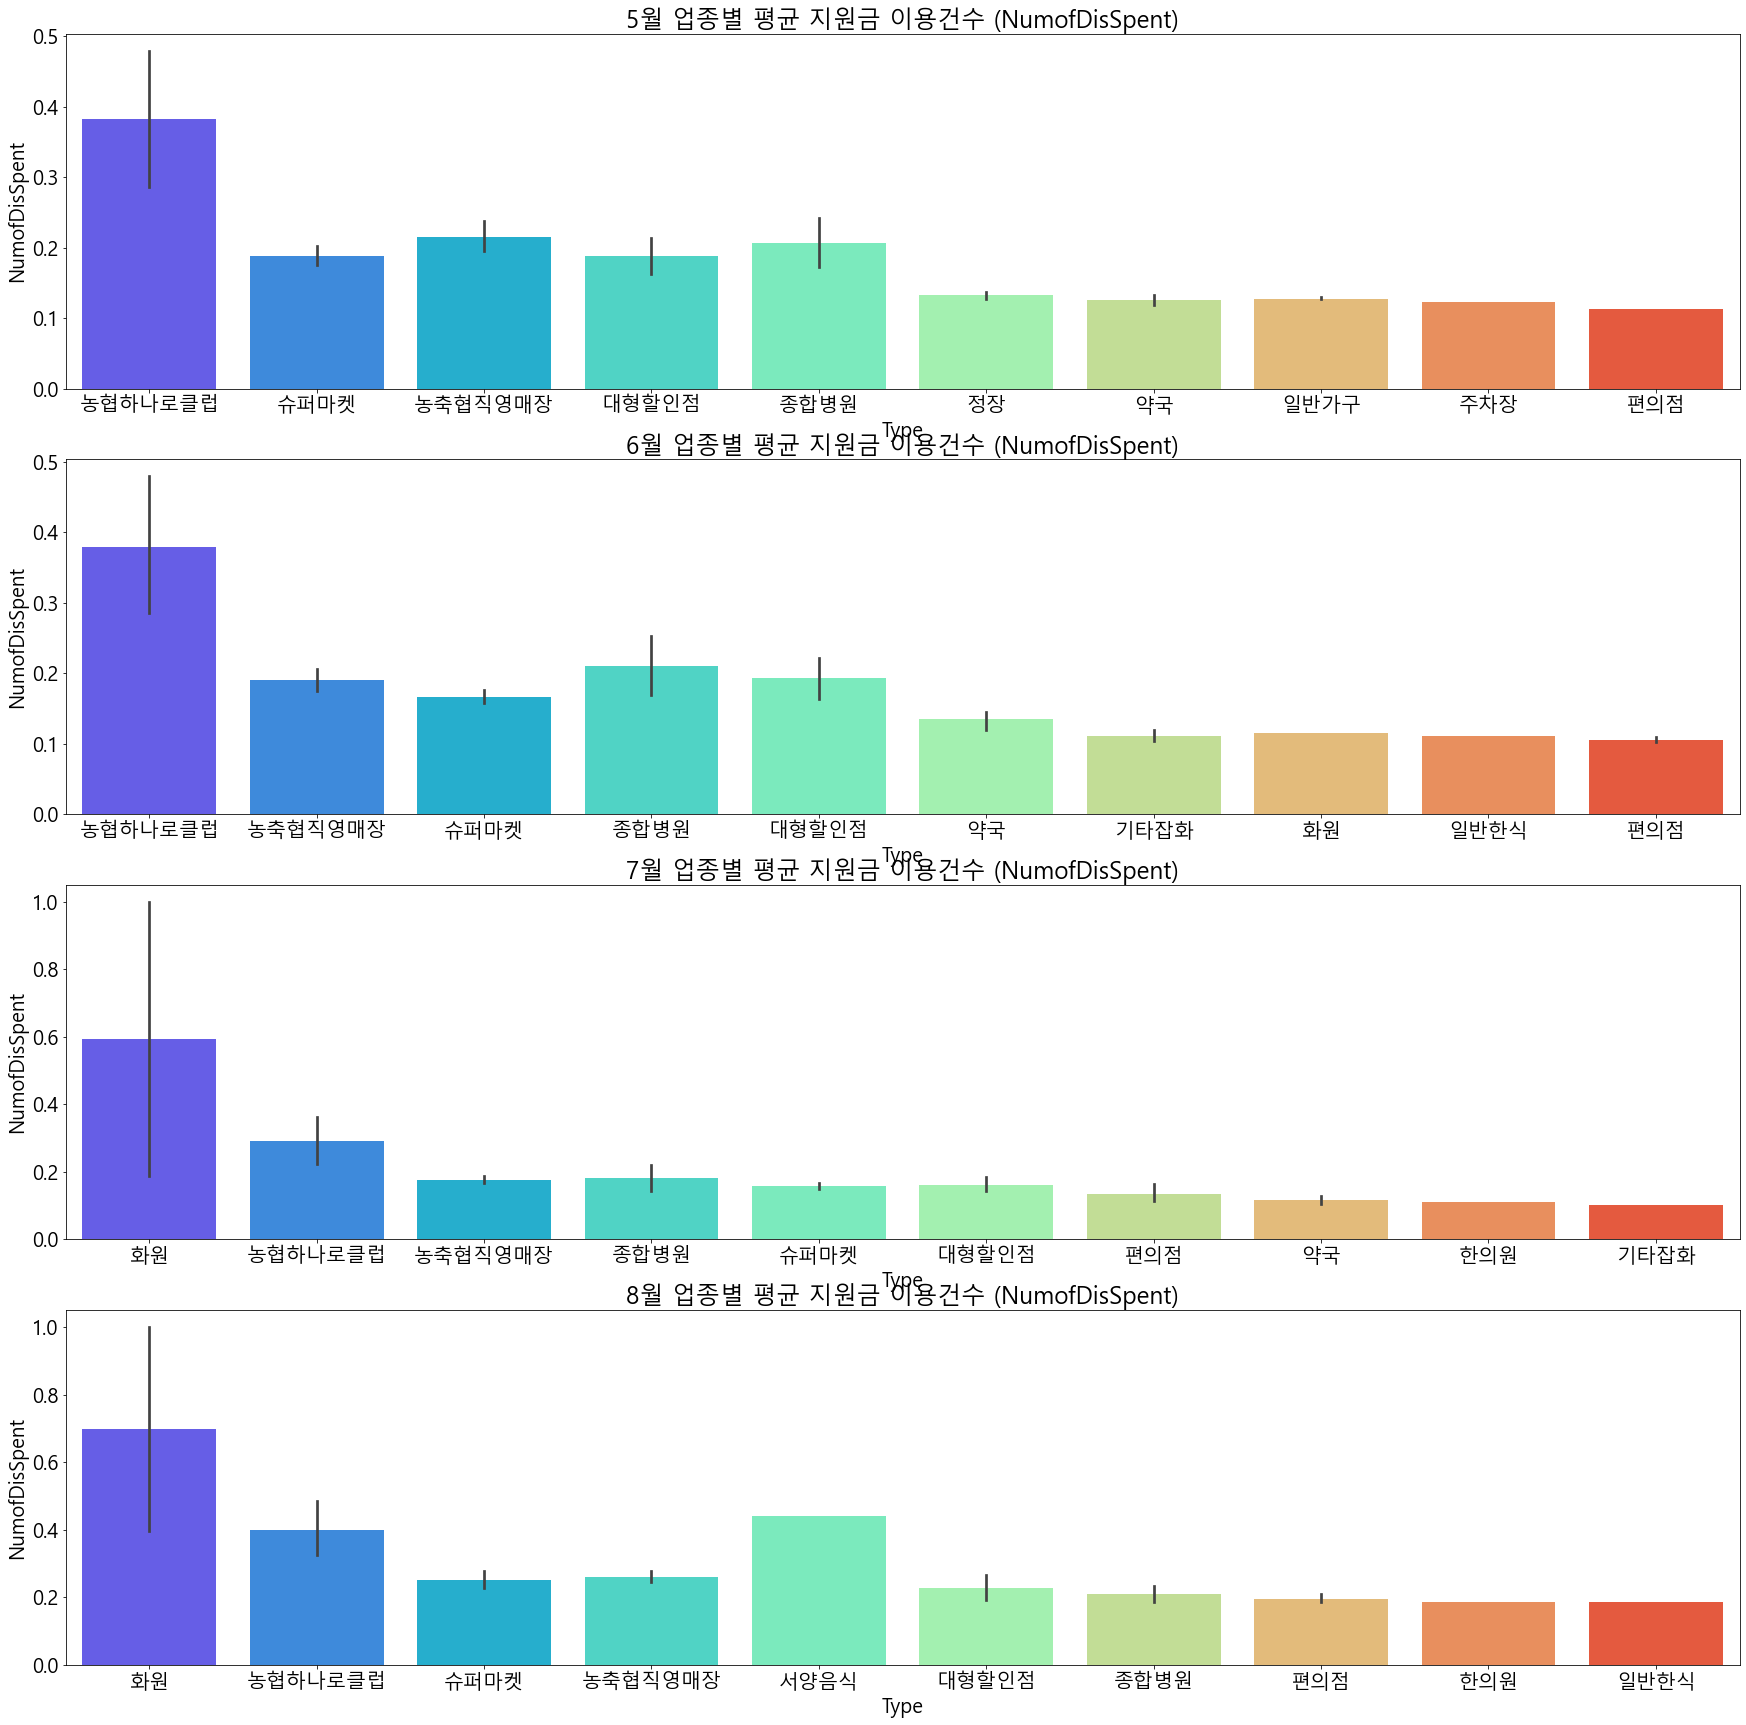

In [25]:
fig = plt.figure(figsize=(30,30))
ax1 = fig.add_subplot(411)
ax1 = sns.barplot(data=df5.nlargest(370, 'NumofDisSpent'), x='Type', y='NumofDisSpent', palette='rainbow')
ax1.set_title('5월 업종별 평균 지원금 이용건수 (NumofDisSpent)')

ax2 = fig.add_subplot(412)
ax2 = sns.barplot(data=df6.nlargest(420, 'NumofDisSpent'), x='Type', y='NumofDisSpent', palette='rainbow')
ax2.set_title('6월 업종별 평균 지원금 이용건수 (NumofDisSpent)')

ax3 = fig.add_subplot(413)
ax3 = sns.barplot(data=df7.nlargest(350, 'NumofDisSpent'), x='Type', y='NumofDisSpent', palette='rainbow')
ax3.set_title('7월 업종별 평균 지원금 이용건수 (NumofDisSpent)')

ax4 = fig.add_subplot(414)
ax4 = sns.barplot(data=df8.nlargest(150, 'NumofDisSpent'), x='Type', y='NumofDisSpent', palette='rainbow')
ax4.set_title('8월 업종별 평균 지원금 이용건수 (NumofDisSpent)')
plt.show()

# 3. 재난지원금 분석

## 3-1. 월별 총 사용금액과 재난지원금

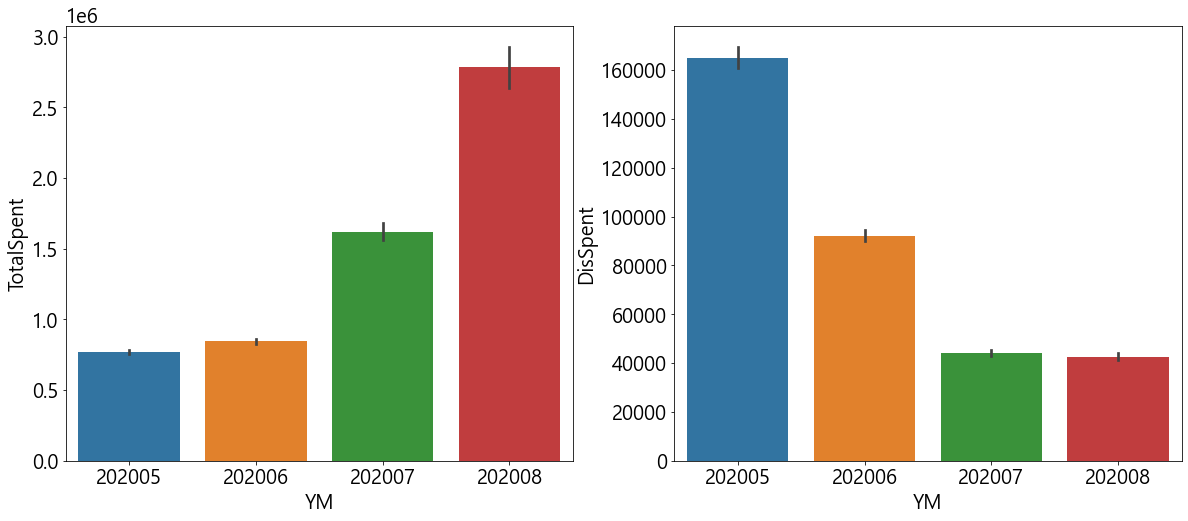

In [26]:
# 월별 총 사용금액과 월별 재난지원금 총 사용금액 

figure, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(20,8)

sns.barplot(data=total, x="YM", y="TotalSpent", ax=ax1)
sns.barplot(data=total, x="YM", y="DisSpent", ax=ax2)

### 월별 총사용금액은 8월에 많이 사용 되고 재난지원금은 5월에 많이 사용되었음을 알 수 있다.

## 3-2. 총 사용금액-재난지원금 사용금액 및 사용건수 비율

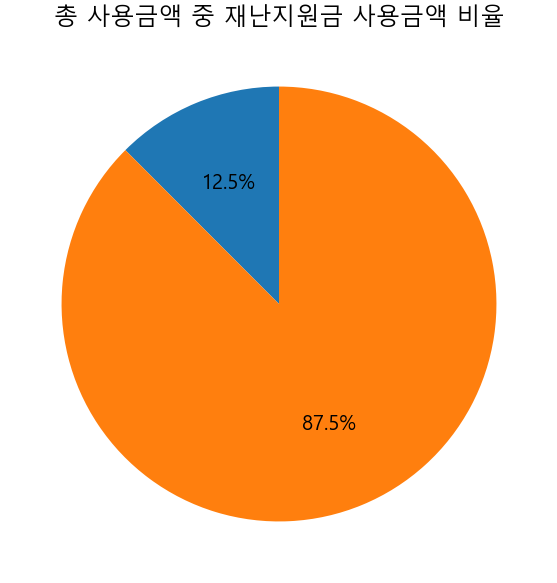

In [27]:
plt.figure(figsize=[12, 10])
sizes = [total.DisSpent.mean()*100/total.TotalSpent.mean(), 100-(total.DisSpent.mean()*100/total.TotalSpent.mean())] 
plt.pie(sizes, autopct='%1.1f%%', startangle=90)
plt.title("총 사용금액 중 재난지원금 사용금액 비율")
plt.show()

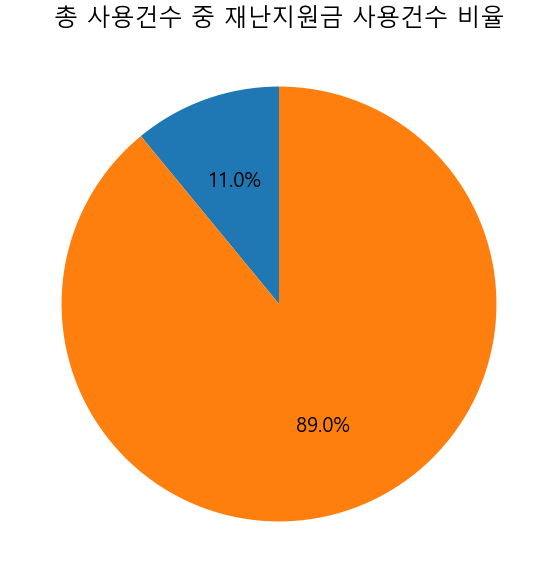

In [28]:
fig = plt.figure(figsize=[12, 10])
sizes = [total.NumofDisSpent.mean()*100/total.NumofSpent.mean(), 100-(total.NumofDisSpent.mean()*100/total.NumofSpent.mean())] 
plt.pie(sizes, autopct='%1.1f%%', startangle=90)
plt.title("총 사용건수 중 재난지원금 사용건수 비율")
plt.show()

### 약 12퍼센트의 비율로 재난지원금을 사용하였다.

## 3-3. 월별 총사용금액 - 재난지원금 사용 비율

In [29]:
total_spent = total.groupby('YM')['TotalSpent'].sum()
dis_spent = total.groupby('YM')['DisSpent'].sum()
month = total_spent/total.TotalSpent.sum()
per = dis_spent/total_spent

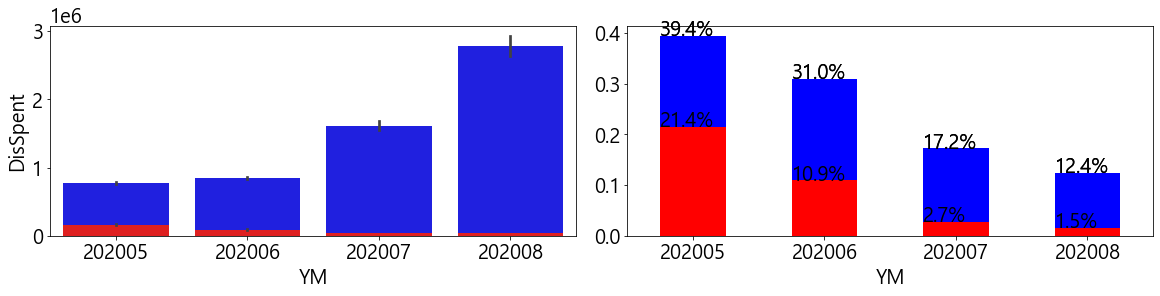

In [30]:
# 월별 총사용금액 - 총사용금액 대비 재난지원금 확인 

figure, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout=True)
figure.set_size_inches(16,4)

sns.barplot(data=total, x='YM', y ='TotalSpent', color='blue', ax=ax1)
sns.barplot(data=total, x='YM', y ='DisSpent', color='red', ax=ax1)


# 총 사용금액의 월별 사용비율 
# 재난지원금 월별 사용 비율
ax2 = month.plot.bar(x='YM', y='0', rot=0, color='blue')
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height())
    x = p.get_x()
    y = p.get_y() + p.get_height()
    ax2.annotate(percentage, (x, y))
ax2 = per.plot.bar(x='YM', y='0', rot=0, color='red')
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height())
    x = p.get_x()
    y = p.get_y() + p.get_height()
    ax2.annotate(percentage, (x, y))

데이콘 대회 : https://dacon.io/competitions/official/235682/overview/

일부 참고 자료 : https://dacon.io/competitions/official/235682/codeshare/2053?page=1&dtype=recent&ptype=pub